In [135]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sympy import *
dt = 0.001
from scipy.special import comb

In [20]:
def Raplicator_Dynamics_Fig_1(N = 4,
                        M = 5,
                        beta_def = 4,
                        beta_cop = 2,
                        d = 4,
                        c = 1,
                        l = 0.5):
    x_def = [0.5]
    x_cop = [0.25]
    x_lay = [0.25]
    for t in range(50000):
        Prob_def = 0
        Prob_cop = 0
        Prob_lay = 0
        for N_def in range(N):
            for N_lay in range(N - N_def):
                N_cop = N - N_def - N_lay
                pai_def = (beta_def * d * M) / (beta_def * (N_def + 1) * d + beta_cop * N_cop * c + N_lay * l) - d
                pai_cop = (beta_cop * c * M) / (beta_def * N_def * d + beta_cop * (N_cop + 1) * c + N_lay * l) - c
                pai_lay =            (l * M) / (beta_def * N_def * d + beta_cop * N_cop * c   +(N_lay + 1) *l) - l

                Prob_def += comb(N, N_def) * comb(N, N - N_def, N_lay) * x_def[t] ** N_def * (1 - x_lay[t] - x_def[t]) ** N_cop * x_lay[t] ** N_lay * pai_def

                Prob_cop += comb(N, N_def) * comb(N, N - N_def, N_lay) * x_def[t] ** N_def * (1 - x_lay[t] - x_def[t]) ** N_cop * x_lay[t] ** N_lay * pai_cop

                Prob_lay += comb(N, N_def) * comb(N, N - N_def, N_lay) * x_def[t] ** N_def * (1 - x_lay[t] - x_def[t]) ** N_cop * x_lay[t] ** N_lay * pai_lay

        Prob_Avg = x_def[t] * Prob_def + x_cop[t] * Prob_cop + x_lay[t] * Prob_lay

        x_def.append(x_def[t] + (x_def[t] * (Prob_def - Prob_Avg)) * dt)
        x_cop.append(x_cop[t] + (x_cop[t] * (Prob_cop - Prob_Avg)) * dt)
        x_lay.append(x_lay[t] + (x_lay[t] * (Prob_lay - Prob_Avg)) * dt)

    plt.plot(x_def,'g')

先考察Fig 1下方三个图的特例（`x_def = 0.5`时）,这里取`M = 25, 15, 10, 5`

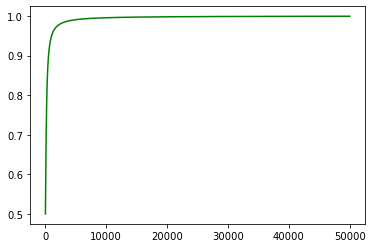

In [21]:
Raplicator_Dynamics_Fig_1(M = 25)

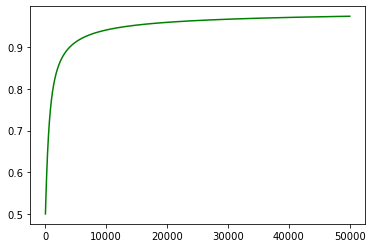

In [22]:
Raplicator_Dynamics_Fig_1(M = 15)

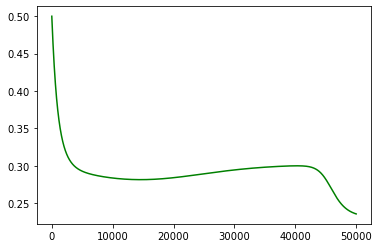

In [25]:
Raplicator_Dynamics_Fig_1(M = 10)

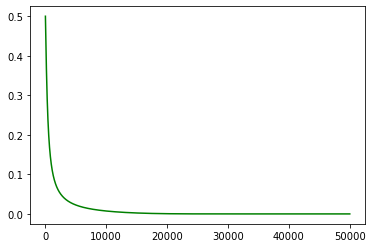

In [24]:
Raplicator_Dynamics_Fig_1(M = 5)

接下来，试图作出`Fig 1`下方三个图的全貌

令`cop`的人群初始值保持不变，为0.2，则`lay`的人群比例随着`def`人群比例改变而改变

In [70]:
def Raplicator_Dynamics_Fig_11(N = 4,
                              M = 5,
                              beta_def = 4,
                              beta_cop = 2,
                              d = 4,
                              c = 1,
                              l = 0.5):
    counter = []
    for i in range(2,102,10):
        counter.append(i / 100)
    for i in range(len(counter)):
        x_def = [counter[i]]
        x_cop = [0.2]
        x_lay = [0.8 - counter[i]]

        for t in range(50000):
            Prob_def = 0
            Prob_cop = 0
            Prob_lay = 0
            for N_def in range(N):
                for N_lay in range(N - N_def):
                    N_cop = N - N_def - N_lay
                    pai_def = (beta_def * d * M) / (beta_def * (N_def + 1) * d + beta_cop * N_cop * c + N_lay * l) - d
                    pai_cop = (beta_cop * c * M) / (beta_def * N_def * d + beta_cop * (N_cop + 1) * c + N_lay * l) - c
                    pai_lay =            (l * M) / (beta_def * N_def * d + beta_cop * N_cop * c   +(N_lay + 1) *l) - l

                    Prob_def += comb(N, N_def) * comb(N, N - N_def, N_lay) * x_def[t] ** N_def * (1 - x_lay[t] - x_def[t]) ** N_cop * x_lay[t] ** N_lay * pai_def

                    Prob_cop += comb(N, N_def) * comb(N, N - N_def, N_lay) * x_def[t] ** N_def * (1 - x_lay[t] - x_def[t]) ** N_cop * x_lay[t] ** N_lay * pai_cop

                    Prob_lay += comb(N, N_def) * comb(N, N - N_def, N_lay) * x_def[t] ** N_def * (1 - x_lay[t] - x_def[t]) ** N_cop * x_lay[t] ** N_lay * pai_lay

            Prob_Avg = x_def[t] * Prob_def + x_cop[t] * Prob_cop + x_lay[t] * Prob_lay

            x_def.append(x_def[t] + (x_def[t] * (Prob_def - Prob_Avg)) * dt)
            x_cop.append(x_cop[t] + (x_cop[t] * (Prob_cop - Prob_Avg)) * dt)
            x_lay.append(x_lay[t] + (x_lay[t] * (Prob_lay - Prob_Avg)) * dt)

            if x_def[t+1] < 0:
                break

            if x_cop[t+1] < 0:
                break

            if x_lay[t+1] < 0:
                break

        plt.plot(x_def)
            #print(x_def)

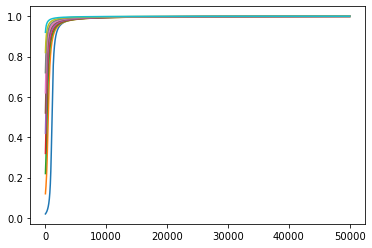

In [55]:
Raplicator_Dynamics_Fig_11(M = 25)

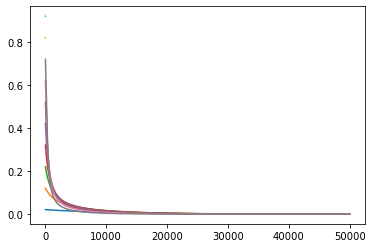

In [73]:
Raplicator_Dynamics_Fig_11(M = 5)

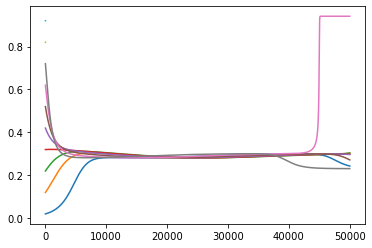

In [71]:
Raplicator_Dynamics_Fig_11(M = 10)

算力太低了，只能画几条线.

现在开始作`Fig 1`上面的图

In [128]:
def Raplicator_Dynamics_Fig_111(N = 4,
                               M = 5,
                               beta_def = 4,
                               beta_cop = 2,
                               d = 4,
                               c = 1,
                               l = 0.5):
    counter = []
    y_point = []
    y_star = []
    for i in range(0,1002,2):
        counter.append(i / 1000)
    for i in range(len(counter)):
        x_def = [counter[i]]
        x_cop = [0.2]
        x_lay = [0.8 - counter[i]]

        #for t in range(50000):
        Prob_def = 0
        Prob_cop = 0
        Prob_lay = 0
        for N_def in range(N):
            for N_lay in range(N - N_def):
                N_cop = N - N_def - N_lay
                pai_def = (beta_def * d * M) / (beta_def * (N_def + 1) * d + beta_cop * N_cop * c + N_lay * l) - d
                pai_cop = (beta_cop * c * M) / (beta_def * N_def * d + beta_cop * (N_cop + 1) * c + N_lay * l) - c
                pai_lay =            (l * M) / (beta_def * N_def * d + beta_cop * N_cop * c   +(N_lay + 1) *l) - l

                Prob_def += comb(N, N_def) * comb(N, N - N_def, N_lay) * x_def[0] ** N_def * (1 - x_lay[0] - x_def[0]) ** N_cop * x_lay[0] ** N_lay * pai_def

                Prob_cop += comb(N, N_def) * comb(N, N - N_def, N_lay) * x_def[0] ** N_def * (1 - x_lay[0] - x_def[0]) ** N_cop * x_lay[0] ** N_lay * pai_cop

                Prob_lay += comb(N, N_def) * comb(N, N - N_def, N_lay) * x_def[0] ** N_def * (1 - x_lay[0] - x_def[0]) ** N_cop * x_lay[0] ** N_lay * pai_lay

        Prob_Avg = x_def[0] * Prob_def + x_cop[0] * Prob_cop + x_lay[0] * Prob_lay

        y_point_item = x_def[0] * (Prob_def - Prob_Avg)
        y_point.append(y_point_item)
        if len(y_point) < 2:
            if abs(y_point_item) < 0.0001:
                y_star.append(counter[i])
        else:
            if y_point[i] * y_point[i-1] < 0:
                y_star.append(counter[i])

            #y_star.append(counter[i])
            #x_def.append(x_def[0] + (x_def[t] * (Prob_def - Prob_Avg)) * dt)
            #x_cop.append(x_cop[0] + (x_cop[t] * (Prob_cop - Prob_Avg)) * dt)
            #x_lay.append(x_lay[0] + (x_lay[t] * (Prob_lay - Prob_Avg)) * dt)
    zero_list = []
    for i in range(len(y_star)):
        zero_list.append(0)
    plt.plot(counter, y_point, color = 'green')
    plt.scatter(y_star,zero_list, s=50)
    print(y_star)

[0.0, 0.982]


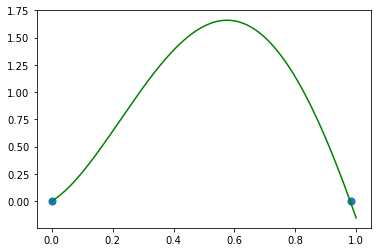

In [129]:
Raplicator_Dynamics_Fig_111(M=25)

[0.0]


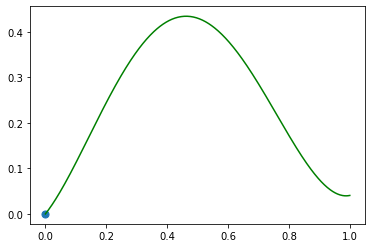

In [130]:
Raplicator_Dynamics_Fig_111(M=15)

[0.0, 0.324, 0.964]


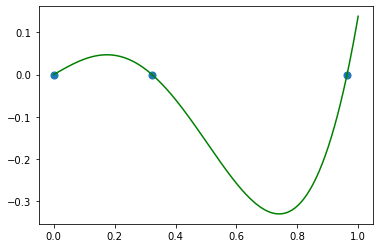

In [131]:
Raplicator_Dynamics_Fig_111(M=10)

[0.0, 0.97]


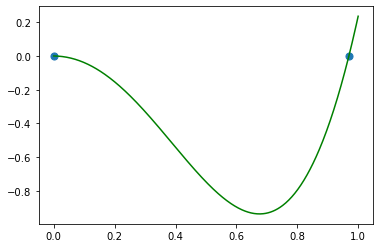

In [132]:
Raplicator_Dynamics_Fig_111(M=5)

尝试构造第三轴，进行3D化

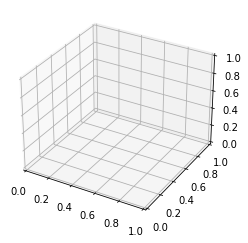

In [136]:
fig = plt.figure()
ax1 = plt.axes(projection='3d')

穷举所有的可能

In [133]:
def answer_set(scalar = 0.02):
    total = []
    p = int(1 / scalar)
    for i in range(p):
        q = p - i
        for j in range(q):
            r = q - j
            total.append([i,j,r])
    for i in total:
        for j in range(3):
            i[j] = round(i[j] *scalar, 2)
    return total

In [195]:
def Raplicator_Dynamics_Fig_1111(N = 4,
                                M = 5,
                                beta_def = 4,
                                beta_cop = 2,
                                d = 4,
                                c = 1,
                                l = 0.5):
    X_def = []
    X_cop = []
    X_lay = []
    Timez = []

    counter = []
    for i in range(0,102,2):
        counter.append(i / 1000)
    data = answer_set(scalar=0.2)

    fig = plt.figure()
    ax1 = plt.axes(projection='3d')
    ax1.set_xlabel('x_def', labelpad=15)
    ax1.set_ylabel('x_lay', labelpad=15)
    ax1.set_zlabel('time', labelpad=15)

    for i in range(len(data)):
        x_lay = [data[i][0]]
        x_cop = [data[i][1]]
        x_def = [data[i][2]]
        z_time= [0]
        time = [t for t in range(60)]
        for t in range(len(time)-1):
            Prob_def = 0
            Prob_cop = 0
            Prob_lay = 0
            for N_def in range(N):
                for N_lay in range(N - N_def):
                    N_cop = N - N_def - N_lay
                    pai_def = (beta_def * d * M) / (beta_def * (N_def + 1) * d + beta_cop * N_cop * c + N_lay * l) - d
                    pai_cop = (beta_cop * c * M) / (beta_def * N_def * d + beta_cop * (N_cop + 1) * c + N_lay * l) - c
                    pai_lay =            (l * M) / (beta_def * N_def * d + beta_cop * N_cop * c   +(N_lay + 1) *l) - l

                    Prob_def += comb(N, N_def) * comb(N, N - N_def, N_lay) * x_def[t] ** N_def * (1 - x_lay[t] - x_def[t]) ** N_cop * x_lay[t] ** N_lay * pai_def

                    Prob_cop += comb(N, N_def) * comb(N, N - N_def, N_lay) * x_def[t] ** N_def * (1 - x_lay[t] - x_def[t]) ** N_cop * x_lay[t] ** N_lay * pai_cop

                    Prob_lay += comb(N, N_def) * comb(N, N - N_def, N_lay) * x_def[t] ** N_def * (1 - x_lay[t] - x_def[t]) ** N_cop * x_lay[t] ** N_lay * pai_lay

            Prob_Avg = x_def[t] * Prob_def + x_cop[t] * Prob_cop + x_lay[t] * Prob_lay

            x_def.append(x_def[t] + (x_def[t] * (Prob_def - Prob_Avg)) * dt)
            x_cop.append(x_cop[t] + (x_cop[t] * (Prob_cop - Prob_Avg)) * dt)
            x_lay.append(x_lay[t] + (x_lay[t] * (Prob_lay - Prob_Avg)) * dt)
            z_time.append(t)
            if x_def[t+1] < 0:
                break

            if x_cop[t+1] < 0:
                break

            if x_lay[t+1] < 0:
                break

            ax1.plot3D(x_def, x_lay, z_time)
        #X_lay.extend(x_lay)
        #X_def.extend(x_def)
        #Timez.extend(time)

    #ax1.set_xlim([0,1])
    #ax1.set_ylim([0,1])
    #ax1.set_xticks(counter)
    #ax1.set_yticks(counter)


        #print(x_def)
        #print(x_lay)
        #print(time)
    #ax1.plot3D(x_def, x_lay, Timez)
    #ax1.scatter3D(X_lay, X_def, Timez)
    plt.show()
        #print(x_def)

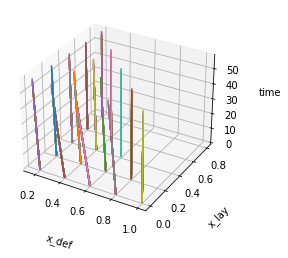

In [196]:
Raplicator_Dynamics_Fig_1111()